82
40
32
43
38


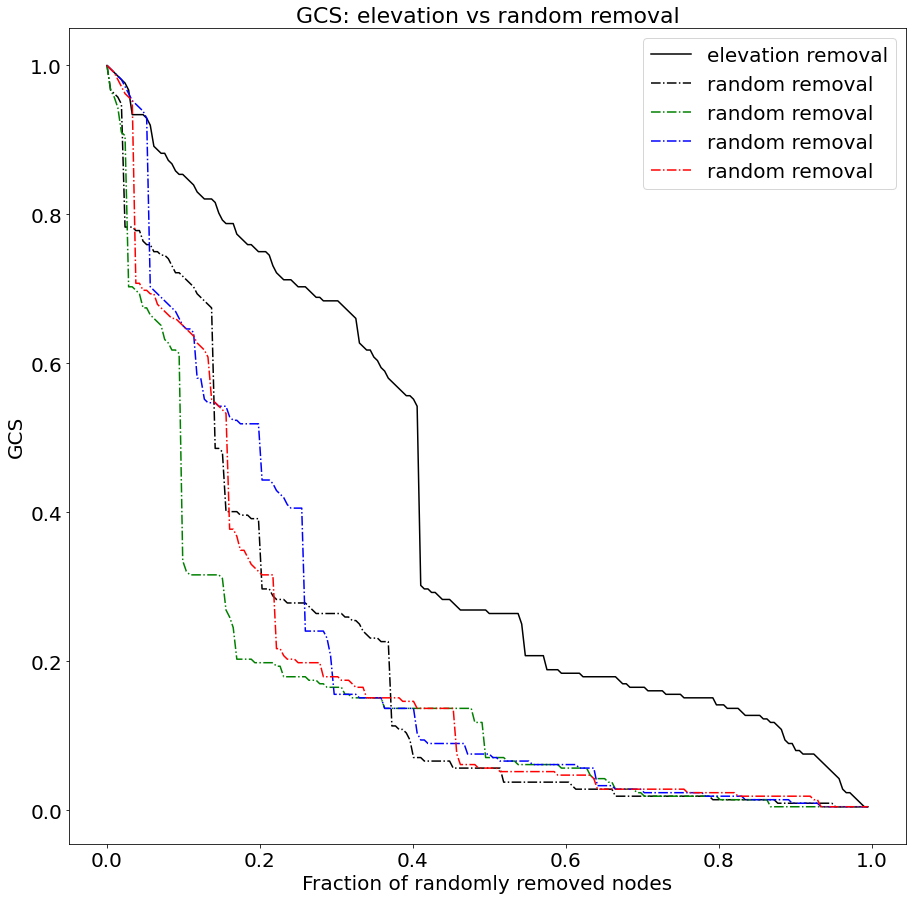

In [4]:
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import geopandas as gpd
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
import random

G = nx.read_graphml('E:\\Barriers\\Graphs\\NC21.graphml')
# Pull out elevation attribute
E = nx.get_node_attributes(G,'Elevations')
# Convert str values in float to be able to sort them 
E = dict(zip(E.keys(), [float(value) for value in E.values()]))
# Sort it based on elevation, min first
Sorted_E = sorted(E.items(), key=lambda item: item[1])
CCs = np.zeros([len(Sorted_E),2])
# Select first element of each tuple in the list (nodes ID):
FT = [i[0] for i in Sorted_E]
# Select second element of each tuple in the list (elevation) and convert to float
ST = [i[1] for i in Sorted_E]
for i in range(len(ST)):
    ST[i] = float(ST[i])

# Loop through all nodes
for i in range(0, len(FT)):
    # Find the node with lowest elevation from the list using i and remove it
    G.remove_nodes_from(FT[0:i])
    # Check giant component size
    CCs[int(i),0]= largest_cc = len(max(nx.weakly_connected_components(G), key=len))/len(FT)
    
# Calculate robustness following Schneider's equation (2011) and include it in plot
s= sum(CCs[:,0])
r= s/len(FT)
r_norm= int(round(r/0.5*100))
print(r_norm)

x_coord = 1 * np.arange(len(CCs))/len(CCs) # x axis
plt.plot(x_coord,CCs[:,0],'-k', label="elevation removal")
##################################################################################
G = nx.read_graphml('E:\\Barriers\\Graphs\\NC21.graphml')
FT_rdm= random.sample(FT, len(FT))
# Loop through all nodes
for i in range(0, len(FT_rdm)):
    # Find the node with lowest elevation from the list using i and remove it
    G.remove_nodes_from(FT_rdm[0:i])
    # Check giant component size
    CCs[int(i),1]= largest_cc = len(max(nx.weakly_connected_components(G), key=len))/len(FT_rdm)
    
# Calculate robustness following Schneider's equation (2011) and include it in plot
s2= sum(CCs[:,1])
r2= s2/len(FT_rdm)
r_norm2= int(round(r2/0.5*100))
print(r_norm2)

plt.plot(x_coord,CCs[:,1],'-.k', label="random removal")
      
#############################################################################################
G = nx.read_graphml('E:\\Barriers\\Graphs\\NC21.graphml')
FT_rdm= random.sample(FT, len(FT))
# Loop through all nodes
for i in range(0, len(FT_rdm)):
    # Find the node with lowest elevation from the list using i and remove it
    G.remove_nodes_from(FT_rdm[0:i])
    # Check giant component size
    CCs[int(i),1]= largest_cc = len(max(nx.weakly_connected_components(G), key=len))/len(FT_rdm)
    
# Calculate robustness following Schneider's equation (2011) and include it in plot
s2= sum(CCs[:,1])
r2= s2/len(FT_rdm)
r_norm2= int(round(r2/0.5*100))
print(r_norm2)

plt.plot(x_coord,CCs[:,1],'-.g', label="random removal")
###########################################################################################
G = nx.read_graphml('E:\\Barriers\\Graphs\\NC21.graphml')
FT_rdm= random.sample(FT, len(FT))
# Loop through all nodes
for i in range(0, len(FT_rdm)):
    # Find the node with lowest elevation from the list using i and remove it
    G.remove_nodes_from(FT_rdm[0:i])
    # Check giant component size
    CCs[int(i),1]= largest_cc = len(max(nx.weakly_connected_components(G), key=len))/len(FT_rdm)
    
# Calculate robustness following Schneider's equation (2011) and include it in plot
s2= sum(CCs[:,1])
r2= s2/len(FT_rdm)
r_norm2= int(round(r2/0.5*100))
print(r_norm2)

plt.plot(x_coord,CCs[:,1],'-.b', label="random removal")
#############################################################
G = nx.read_graphml('E:\\Barriers\\Graphs\\NC21.graphml')
FT_rdm= random.sample(FT, len(FT))
# Loop through all nodes
for i in range(0, len(FT_rdm)):
    # Find the node with lowest elevation from the list using i and remove it
    G.remove_nodes_from(FT_rdm[0:i])
    # Check giant component size
    CCs[int(i),1]= largest_cc = len(max(nx.weakly_connected_components(G), key=len))/len(FT_rdm)
    
# Calculate robustness following Schneider's equation (2011) and include it in plot
s2= sum(CCs[:,1])
r2= s2/len(FT_rdm)
r_norm2= int(round(r2/0.5*100))
print(r_norm2)

plt.plot(x_coord,CCs[:,1],'-.r', label="random removal")


###################################################################
plt.rcParams["figure.figsize"] = (15,15)  
plt.rcParams["font.size"]= 20    

plt.xlabel("Fraction of randomly removed nodes")
plt.ylabel("GCS")
plt.title("GCS: elevation vs random removal", fontsize=22)
plt.legend()



plt.savefig(r'C:\Users\Sofia\Dropbox\NETWORKS\All_barriers\Figures\RandomRemoval_Examples\NC21_Random.png', dpi=300, facecolor='w', bbox_inches='tight',pad_inches = 0)